In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('tmdb-movies.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10845 non-null  int64  
 1   imdb_id               10835 non-null  object 
 2   popularity            10845 non-null  float64
 3   budget                10845 non-null  int64  
 4   revenue               10845 non-null  int64  
 5   original_title        10845 non-null  object 
 6   cast                  10750 non-null  object 
 7   homepage              2953 non-null   object 
 8   director              10781 non-null  object 
 9   tagline               8035 non-null   object 
 10  keywords              9369 non-null   object 
 11  overview              10841 non-null  object 
 12  runtime               10844 non-null  object 
 13  genres                10815 non-null  object 
 14  production_companies  9831 non-null   object 
 15  release_date       

In [2]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                  object
genres                   object
production_companies     object
release_date             object
vote_count               object
vote_average             object
release_year             object
budget_adj               object
revenue_adj              object
Unnamed: 21              object
Unnamed: 22              object
Unnamed: 23              object
Unnamed: 24              object
Unnamed: 25              object
Unnamed: 26             float64
Unnamed: 27             float64
Unnamed: 28             float64
Unnamed: 29             float64
Unnamed: 30             float64
dtype: o

In [3]:
df['popularity'].dtype

dtype('float64')

In [4]:
type(df['release_date'][0])

str

In [5]:
new_data=df[['genres', 'popularity','original_title', 'release_year', 'budget', 'revenue']].dropna(axis=0, how='any')

In [6]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10815 entries, 0 to 10844
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          10815 non-null  object 
 1   popularity      10815 non-null  float64
 2   original_title  10815 non-null  object 
 3   release_year    10815 non-null  object 
 4   budget          10815 non-null  int64  
 5   revenue         10815 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 591.4+ KB


In [7]:
df_comedy=new_data[new_data['genres'].str.contains("Comedy")]

In [8]:
df_comedy

,genres,popularity,original_title,release_year,budget,revenue
8,Family|Animation|Adventure|Comedy,7.404165,Minions,2015,74000000,1156730962
9,Comedy|Animation|Family,6.326804,Inside Out,2015,175000000,853708609
12,Action|Comedy|Science Fiction,5.984995,Pixels,2015,88000000,243637091
23,Comedy|Drama,4.648046,The Big Short,2015,28000000,133346506
25,Comedy,4.564549,Ted 2,2015,68000000,215863606
...,...,...,...,...,...,...
10835,Comedy|Drama|Family,0.140934,The Ugly Dachshund,1966,0,0
10837,Comedy|War,0.317824,"The Russians Are Coming, The Russians Are Coming",1966,0,0
10839,Comedy,0.087034,Carry On Screaming!,1966,0,0
10842,Mystery|Comedy,0.065141,Beregis Avtomobilya,1966,0,0


In [9]:
df_action=new_data[new_data['genres'].str.contains("Action")]

In [10]:
df_action

,genres,popularity,original_title,release_year,budget,revenue
0,Action|Adventure|Science Fiction|Thriller,32.985763,Jurassic World,2015,150000000,1513528810
1,Action|Adventure|Science Fiction|Thriller,28.419936,Mad Max: Fury Road,2015,150000000,378436354
3,Action|Adventure|Science Fiction|Fantasy,11.173104,Star Wars: The Force Awakens,2015,200000000,2068178225
4,Action|Crime|Thriller,9.335014,Furious 7,2015,190000000,1506249360
6,Science Fiction|Action|Thriller|Adventure,8.654359,Terminator Genisys,2015,155000000,440603537
...,...,...,...,...,...,...
10829,Action|Drama|Thriller|Crime|Mystery,0.202473,Harper,1966,0,0
10830,Adventure|Drama|Action|Family|Foreign,0.342791,Born Free,1966,0,0
10836,Action|Western,0.131378,Nevada Smith,1966,0,0
10841,Action|Adventure|Drama,0.065543,Grand Prix,1966,0,0


In [11]:
genre_action=np.repeat("action", 2365)

In [12]:
print(genre_action) 

['action' 'action' 'action' ... 'action' 'action' 'action']


In [13]:
genre_comedy=np.repeat("comedy",3782)

In [14]:
print(genre_comedy)

['comedy' 'comedy' 'comedy' ... 'comedy' 'comedy' 'comedy']


In [15]:
df_comedy['genre'] = genre_comedy

<ipython-input-15-3d56ece055a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comedy['genre'] = genre_comedy


In [16]:
print(df_comedy)

                                  genres  popularity  \
8      Family|Animation|Adventure|Comedy    7.404165   
9                Comedy|Animation|Family    6.326804   
12         Action|Comedy|Science Fiction    5.984995   
23                          Comedy|Drama    4.648046   
25                                Comedy    4.564549   
...                                  ...         ...   
10835                Comedy|Drama|Family    0.140934   
10837                         Comedy|War    0.317824   
10839                             Comedy    0.087034   
10842                     Mystery|Comedy    0.065141   
10843                      Action|Comedy    0.064317   

                                         original_title release_year  \
8                                               Minions         2015   
9                                            Inside Out         2015   
12                                               Pixels         2015   
23                                     

In [17]:
df_action['genre'] = genre_action

<ipython-input-17-6a23bf1e6ee4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_action['genre'] = genre_action


In [18]:
print(df_action)

                                          genres  popularity  \
0      Action|Adventure|Science Fiction|Thriller   32.985763   
1      Action|Adventure|Science Fiction|Thriller   28.419936   
3       Action|Adventure|Science Fiction|Fantasy   11.173104   
4                          Action|Crime|Thriller    9.335014   
6      Science Fiction|Action|Thriller|Adventure    8.654359   
...                                          ...         ...   
10829        Action|Drama|Thriller|Crime|Mystery    0.202473   
10830      Adventure|Drama|Action|Family|Foreign    0.342791   
10836                             Action|Western    0.131378   
10841                     Action|Adventure|Drama    0.065543   
10843                              Action|Comedy    0.064317   

                     original_title release_year     budget     revenue  \
0                    Jurassic World         2015  150000000  1513528810   
1                Mad Max: Fury Road         2015  150000000   378436354   
3     

In [19]:
movie_df=df_action.append(df_comedy)

In [20]:
print(movie_df)

                                          genres  popularity  \
0      Action|Adventure|Science Fiction|Thriller   32.985763   
1      Action|Adventure|Science Fiction|Thriller   28.419936   
3       Action|Adventure|Science Fiction|Fantasy   11.173104   
4                          Action|Crime|Thriller    9.335014   
6      Science Fiction|Action|Thriller|Adventure    8.654359   
...                                          ...         ...   
10835                        Comedy|Drama|Family    0.140934   
10837                                 Comedy|War    0.317824   
10839                                     Comedy    0.087034   
10842                             Mystery|Comedy    0.065141   
10843                              Action|Comedy    0.064317   

                                         original_title release_year  \
0                                        Jurassic World         2015   
1                                    Mad Max: Fury Road         2015   
3              

Text(0, 0.5, 'revenue')

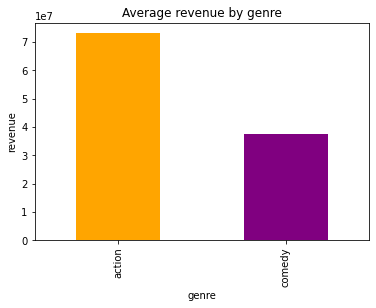

In [21]:
colors=['orange','purple']
ax=movie_df.groupby('genre').mean()['revenue'].plot(kind='bar', title='Average revenue by genre',color=colors)
ax.set_ylabel('revenue')

In [22]:
new_data['popularity'].median()

0.384958

In [23]:
popularity_high=movie_df.query('popularity >= 0.384958' )

In [24]:
print(popularity_high) 

                                              genres  popularity  \
0          Action|Adventure|Science Fiction|Thriller   32.985763   
1          Action|Adventure|Science Fiction|Thriller   28.419936   
3           Action|Adventure|Science Fiction|Fantasy   11.173104   
4                              Action|Crime|Thriller    9.335014   
6          Science Fiction|Action|Thriller|Adventure    8.654359   
...                                              ...         ...   
10789                  Comedy|Horror|Science Fiction    0.409587   
10799                        Animation|Family|Comedy    1.227582   
10806  Family|Adventure|Comedy|Science Fiction|Crime    0.410366   
10810                                 Romance|Comedy    0.529721   
10812                           Comedy|Crime|Romance    0.737730   

                        original_title release_year     budget     revenue  \
0                       Jurassic World         2015  150000000  1513528810   
1                   Mad Max

In [25]:
total=new_data.query('popularity>=0.384958').count()['popularity']

In [26]:
print(total)

5408


In [27]:
genre_high=popularity_high.groupby('genre').count()['popularity']

In [28]:
print(genre_high)

genre
action    1409
comedy    1918
Name: popularity, dtype: int64


Text(0, 0.5, 'proportion')

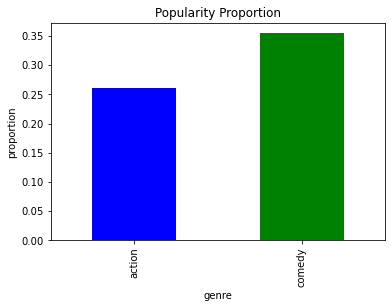

In [29]:
colors=['blue','green']
total=new_data.query('popularity>=0.384958').count()['popularity']
proportions=genre_high/total
ax2=proportions.plot(kind="bar", title= 'Popularity Proportion', color=colors) 
ax2.set_ylabel('proportion')
